In [28]:
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

# Load Data

In [3]:
df_train = pd.read_csv("X_train_stemm_cleaned.csv")
df_valid = pd.read_csv("X_valid_stemm_cleaned.csv")
df_test = pd.read_csv("X_test_stemm_cleaned.csv")

X_train_clean = df_train['tweet_stemming']
X_valid_clean = df_valid['tweet_stemming']
X_test_clean = df_test['tweet_stemming']

y_train = pd.read_csv("y_train.csv")
y_valid = pd.read_csv("y_valid.csv")
y_test = pd.read_csv("y_test.csv")

In [5]:
# Load model TF-IDF
tfidf_vectorizer = load('tfidf_vectorizer.joblib')

# transform set data dari load model tfidf yang telah disimpan
X_train_tfidf = tfidf_vectorizer.transform(X_train_clean)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid_clean)
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

# Model Intialization

In [6]:
# insialisasi model random forest untuk klasifikasi
random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6,
                                       min_samples_leaf=8,
                                       random_state = 123)

In [10]:
# fit random forest model klasifikasi
random_forest.fit(X_train_tfidf, np.ravel(y_train))

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=123)

In [13]:
# score accuracy pada data train
random_forest.score(X_train_tfidf, y_train)

0.6543307086614173

In [19]:
#score accuracy pada data test
random_forest.score(X_test_tfidf, y_test)

0.5551470588235294

In [14]:
y_pred_rf = random_forest.predict(X_test_tfidf)

In [15]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

     negatif       0.59      0.57      0.58        89
      netral       0.54      0.57      0.55        91
     positif       0.55      0.52      0.53        92

    accuracy                           0.56       272
   macro avg       0.56      0.56      0.56       272
weighted avg       0.56      0.56      0.56       272



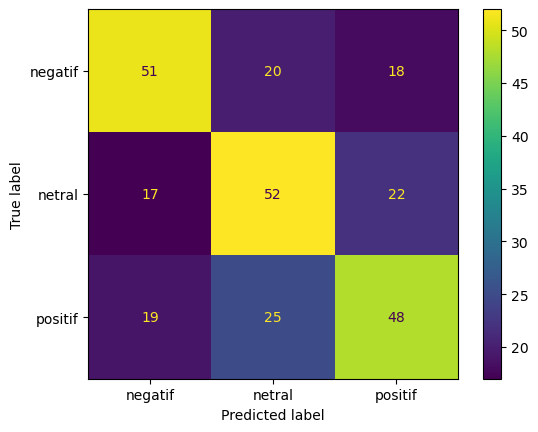

In [18]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=unique_labels)
plt.show()

# Hyperparameter Tuning

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 12, 'criterion': 'entropy'}


C:\Users\andre\AppData\Local\Temp\ipykernel_5556\3798158344.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forestcls_cv.fit(X_train_tfidf, y_train)


Data test
              precision    recall  f1-score   support

     negatif       0.55      0.69      0.61        89
      netral       0.63      0.64      0.63        91
     positif       0.61      0.47      0.53        92

    accuracy                           0.60       272
   macro avg       0.60      0.60      0.59       272
weighted avg       0.60      0.60      0.59       272



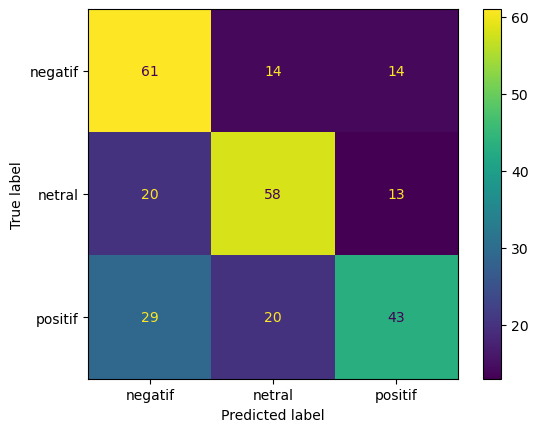

Training Data Score: 0.8606299212598425
Testing Data Score: 0.5955882352941176


In [22]:
# Parameter eksperimen
random_param = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# menggunakan randomizedsearch cv untuk cross validation
random_forestcls = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123),
                                      param_distributions=random_param,
                                      n_iter=50,
                                      cv=5,
                                      scoring="accuracy",
                                      random_state=123)

# fit pada data train
random_forestcls.fit(X_train_tfidf, np.ravel(y_train))

# cek parameter terbaik
best_params = random_forestcls.best_params_
print("Best parameters found: ", best_params)

# buat model dengan definisi best params
random_forestcls_cv = RandomForestClassifier(
    max_depth=best_params["max_depth"],
    criterion=best_params["criterion"],
    n_estimators=best_params["n_estimators"],
    min_samples_leaf=best_params["min_samples_leaf"],
    min_samples_split=best_params["min_samples_split"],
    random_state=123
)

# Fit model pada data train
random_forestcls_cv.fit(X_train_tfidf, y_train)

# cek predict pada data test
print("Data test")
predict_randomcls_cv = random_forestcls_cv.predict(X_test_tfidf)
print(classification_report(y_test, predict_randomcls_cv))

# Plot confusion matrix
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, predict_randomcls_cv, display_labels=unique_labels)
plt.show()

# Evaluasi model
print(f"Training Data Score: {random_forestcls_cv.score(X_train_tfidf, y_train)}")
print(f"Testing Data Score: {random_forestcls_cv.score(X_test_tfidf, y_test)}")

In [29]:
# Save model
dump(random_forestcls_cv, 'random_forest_tuned.joblib')

['random_forest_tuned.joblib']

In [ ]:
# # Load model
# random_forestcls_cv = load('random_forest_tuned.joblib')